In [1]:
%matplotlib inline

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import random

from copy import deepcopy
from PIL import Image
from shutil import copy
from skimage.transform import resize

# Have a look at one ground truth 
#### what do I have to do in terms of preprocessing? 

In [3]:
test_gt = np.asarray(Image.open("/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/REFUGE1-Train-400/Annotation-Training400/Disc_Cup_Masks/Non-Glaucoma/n0001.bmp"))

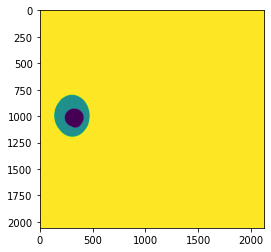

In [4]:
plt.imshow(test_gt)

In [5]:
np.unique(test_gt)

array([  0, 128, 255], dtype=uint8)

In [6]:
test_gt.shape

(2056, 2124)

In [7]:
len(np.where(test_gt==0)[0])

25078

In [8]:
len(np.where(test_gt==128)[0])

76987

In [9]:
len(np.where(test_gt==255)[0])

4264879

Label values: 
- 255: background
- 128: optical disc
- 0: optical cup

In [10]:
test_gt_mod = deepcopy(test_gt)
test_gt_mod[np.where(test_gt == 0)] = 128

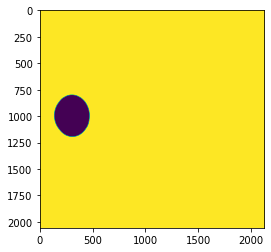

In [11]:
plt.imshow(test_gt_mod)

# 1. get paths of all non-glaucoma and glaucoma images

In [12]:
data_dir = "/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training"

In [13]:
os.listdir(data_dir)

['REFUGE1-Test-400',
 'REFUGE1-Train-400',
 'glaucoma.pkl',
 'REFUGE1-Val-400',
 'non_glaucoma.pkl']

In [14]:
g_data_path_dir = dict()
n_data_path_dir = dict()

### REFUGE1Train

In [15]:
train_dir = os.path.join(data_dir, "REFUGE1-Train-400")
n_g_names =[n_g[:-4] for n_g in os.listdir(os.path.join(train_dir,"Images", "Non-Glaucoma"))]
g_names =[g[:-4] for g in os.listdir(os.path.join(train_dir,"Images", "Glaucoma"))]

In [16]:
image_dir = os.path.join(train_dir, "Images")
annotation_dir = os.path.join(train_dir, "Annotation-Training400", "Disc_Cup_Masks")

In [17]:
for g in g_names:
    # dictionary entries: name: [image_path, annotation_path]
    image_g_dir = os.path.join(image_dir, "Glaucoma")
    annotation_g_dir = os.path.join(annotation_dir, "Glaucoma")
    g_data_path_dir[g] = [os.path.join(image_g_dir, g+".jpg"), os.path.join(annotation_g_dir, g+".bmp")]

In [18]:
for ng in n_g_names:
    # dictionary entries: name: [image_path, annotation_path]
    image_ng_dir = os.path.join(image_dir, "Non-Glaucoma")
    annotation_ng_dir = os.path.join(annotation_dir, "Non-Glaucoma")
    n_data_path_dir[ng] = [os.path.join(image_ng_dir, ng+".jpg"), os.path.join(annotation_ng_dir, ng+".bmp")]

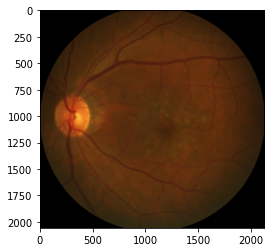

In [19]:
test = np.asarray(Image.open(n_data_path_dir["n0001"][0]))
plt.imshow(test)

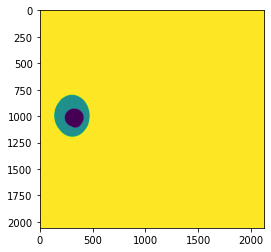

In [20]:
test = np.asarray(Image.open(n_data_path_dir["n0001"][1]))
plt.imshow(test)

### REFUGE1Val
need to read the diagnosis from excel sheet 

In [21]:
val_dir = os.path.join(data_dir, "REFUGE1-Val-400")

In [22]:
val_gt_sheet = pd.read_excel(os.path.join(val_dir, "REFUGE-Validation400-GT", "Fovea_locations.xlsx"), \
                             engine="openpyxl")

In [23]:
n_g_names = val_gt_sheet.loc[val_gt_sheet["Glaucoma Label"] == 0]["ImgName"].tolist()
g_names = val_gt_sheet.loc[val_gt_sheet["Glaucoma Label"] == 1]["ImgName"].tolist()

n_g_names = [ng[:-4] for ng in n_g_names]
g_names = [g[:-4] for g in g_names]

In [24]:
image_dir = os.path.join(val_dir, "REFUGE-Validation400")
annotation_dir = os.path.join(val_dir, "REFUGE-Validation400-GT", "Disc_Cup_Masks")

In [25]:
for g in g_names:
    # dictionary entries: name: [image_path, annotation_path]
    g_data_path_dir[g] = [os.path.join(image_dir, g+".jpg"), os.path.join(annotation_dir, g+".bmp")]

In [26]:
for ng in n_g_names:
    # dictionary entries: name: [image_path, annotation_path]
    n_data_path_dir[ng] = [os.path.join(image_dir, ng+".jpg"), os.path.join(annotation_dir, ng+".bmp")]

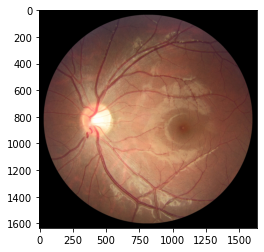

In [27]:
test = np.asarray(Image.open(n_data_path_dir["V0001"][0]))
plt.imshow(test)

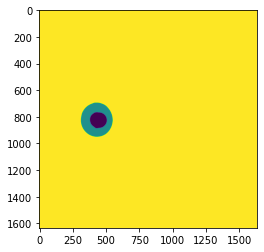

In [29]:
test = np.asarray(Image.open(n_data_path_dir["V0001"][1]))
plt.imshow(test)

### REFUGE1Test
need to read the diagnosis from excel sheet 

In [30]:
test_dir = os.path.join(data_dir, "REFUGE1-Test-400")

In [31]:
test_gt_sheet = pd.read_excel(os.path.join(test_dir, "Annotation", "Glaucoma_label_and_Fovea_location.xlsx"), \
                             engine="openpyxl")

In [32]:
n_g_names = test_gt_sheet.loc[test_gt_sheet["Label(Glaucoma=1)"] == 0]["ImgName"].tolist()
g_names = test_gt_sheet.loc[test_gt_sheet["Label(Glaucoma=1)"] == 1]["ImgName"].tolist()

n_g_names = [ng[:-4] for ng in n_g_names]
g_names = [g[:-4] for g in g_names]

In [33]:
image_dir = os.path.join(test_dir, "Images")
annotation_dir = os.path.join(test_dir, "Annotation", "Disc_Cup_Masks")

In [34]:
for g in g_names:
    # dictionary entries: name: [image_path, annotation_path]
    g_data_path_dir[g] = [os.path.join(image_dir, g+".jpg"), os.path.join(annotation_dir,"G", g+".bmp")]

In [35]:
for ng in n_g_names:
    # dictionary entries: name: [image_path, annotation_path]
    n_data_path_dir[ng] = [os.path.join(image_dir, ng+".jpg"), os.path.join(annotation_dir,"N", ng+".bmp")]

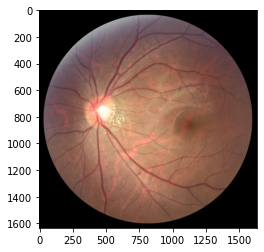

In [36]:
test = np.asarray(Image.open(n_data_path_dir["T0001"][0]))
plt.imshow(test)

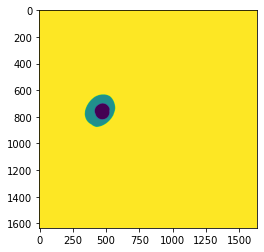

In [37]:
test = np.asarray(Image.open(n_data_path_dir["T0001"][1]))
plt.imshow(test)

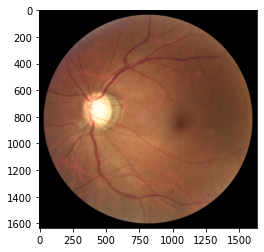

In [38]:
test = np.asarray(Image.open(g_data_path_dir["T0010"][0]))
plt.imshow(test)

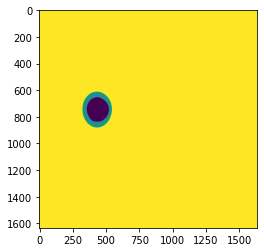

In [39]:
test = np.asarray(Image.open(g_data_path_dir["T0010"][1]))
plt.imshow(test)

In [40]:
print("number of non-glaucoma cases: ", len(n_data_path_dir.keys()))
print("number of glaucoma cases: ", len(g_data_path_dir.keys()))

number of non-glaucoma cases:  1080
number of glaucoma cases:  120


#### pickle the dictionaries 

In [41]:
filepath = "/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training"
with open(os.path.join(filepath, "non_glaucoma.pkl"), 'wb') as file:
      
    # A new file will be created
    pickle.dump(n_data_path_dir, file)

In [42]:
with open(os.path.join(filepath, "glaucoma.pkl"), 'wb') as file:
      
    # A new file will be created
    pickle.dump(g_data_path_dir, file)

## Test the label encoding and data loader 

In [240]:
# MONAI imports
from monai.data import Dataset, list_data_collate # , decollate_batch
# from monai.handlers.utils import from_engine
from monai.losses import DiceLoss
from monai.inferers import sliding_window_inference
from monai.metrics import DiceMetric
from monai.networks.nets import SegResNet

from monai.transforms import (
    Activations,
    AddChannel,
    AsDiscrete,
    Compose,
    LoadImage,
    RandRotate,
    RandSpatialCrop,
    ScaleIntensity,
    AsChannelFirst,
    AsChannelLast, 
    RandFlip,
    LoadImage
    # EnsureType,
)
from monai.visualize import plot_2d_or_3d_image
from monai.data import ArrayDataset, create_test_image_2d # , decollate_batch
from torchvision.transforms import Lambda

from monai.utils import set_determinism
from monai.utils.misc import first
import torch


In [207]:
set_determinism(seed=0)

In [208]:
# train_files = [{"img": img, "seg": seg} for img, seg in zip(images[:20], segs[:20])]
test_files = [{"img": g_data_path_dir[k][0], "seg": g_data_path_dir[k][1]} for k in g_data_path_dir.keys()]

In [209]:
image_files = [g_data_path_dir[k][0] for k in g_data_path_dir.keys()]
gt_files = [g_data_path_dir[k][1] for k in g_data_path_dir.keys()]

In [241]:
test_imtransforms = Compose(
        [ LoadImage(image_only=True),
         AsChannelFirst(),
         RandFlip(spatial_axis=1, prob=.5),
         RandFlip(spatial_axis=0, prob=.5),
         RandRotate(range_x=15, prob=0.3, keep_size=True),
         ScaleIntensity(),
         ToTensor()
        ]
    )

In [280]:
test_gttransforms = Compose(
        [ LoadImage(image_only=True),
         AsChannelFirst(),
         RandFlip(spatial_axis=1, prob=.5),
         RandFlip(spatial_axis=0, prob=.5),
         RandRotate(range_x=15, prob=0.3, keep_size=True),
         ToTensor(),
         # Lambda(lambda x: torch.cat([x==255, x==0,x==128], 0))
         Lambda(lambda x: x[0,:,:]),
         AddChannel(),
         Lambda(lambda x: torch.cat([x==255, x==0,x==128], 0))
        ]
    )

In [281]:
# check_ds = ODDataset(image_files, labels, test_transforms)
 check_ds = ArrayDataset(image_files, test_imtransforms, gt_files, test_gttransforms)

In [282]:
check_loader = torch.utils.data.DataLoader(check_ds, batch_size=6)#,num_workers=2, collate_fn=list_data_collate) # , num_workers=4 )#,collate_fn=list_data_collate)
check_data = first(check_loader)

In [283]:
check_data[1][0].shape

torch.Size([3, 2056, 2124])

In [267]:
np.unique(check_data[1][0][0].numpy().astype(int))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

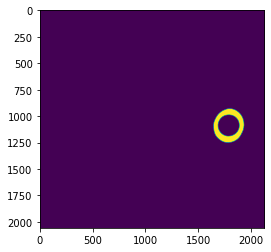

In [286]:
plt.imshow(check_data[1][0][2].numpy().astype(int))

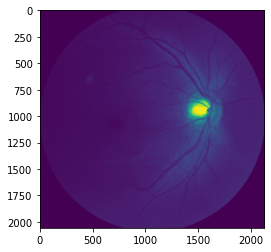

In [263]:
# test = np.asarray(Image.open('/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/REFUGE1-Train-400/Images/Glaucoma/g0019.jpg'))
plt.imshow(check_data[0][1][2])

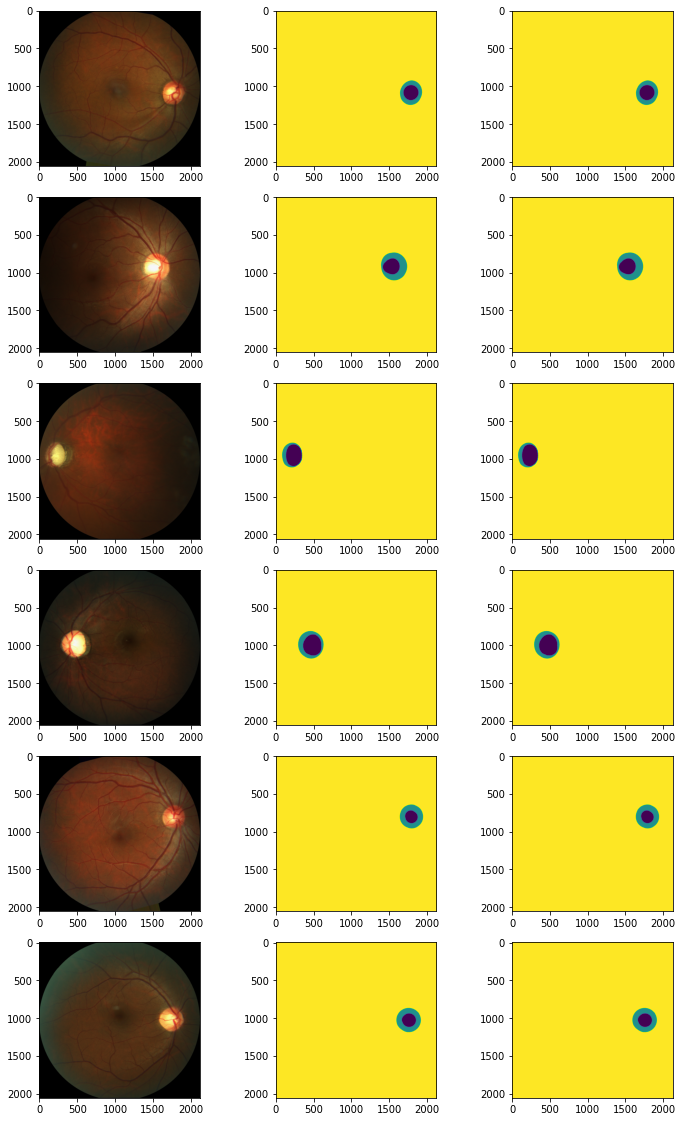

In [264]:
plt.subplots(6,3, figsize=(12,20))
for i in range(6):
    plt.subplot(6,3,i*3+1)
    image = np.zeros((check_data[0][i][0].shape[0], check_data[0][i][0].shape[1],3))
    for c in range(3):
        image[:,:,c] = check_data[0][i][c]
    plt.imshow(image)
    plt.subplot(6,3,i*3+2)
    plt.imshow(check_data[1][i][1])
    plt.subplot(6,3,i*3+3)
    plt.imshow(check_data[1][i][2])

## check whether all images have the same dimensions

In [48]:
different_dims = list()
dims = [2056, 2124, 3]
for k in list(n_data_path_dir.keys())[:15]:
    # if np.asarray(Image.open(n_data_path_dir[k][0])).shape != dims:
        # different_dims.append(k)
    print(np.asarray(Image.open(n_data_path_dir[k][0])).shape)

(2056, 2124, 3)
(2056, 2124, 3)
(2056, 2124, 3)
(2056, 2124, 3)
(2056, 2124, 3)
(2056, 2124, 3)
(2056, 2124, 3)
(2056, 2124, 3)
(2056, 2124, 3)
(2056, 2124, 3)
(2056, 2124, 3)
(2056, 2124, 3)
(2056, 2124, 3)
(2056, 2124, 3)
(2056, 2124, 3)


In [47]:
different_dims

['n0032',
 'n0116',
 'n0054',
 'n0076',
 'n0078',
 'n0086',
 'n0056',
 'n0131',
 'n0221',
 'n0106',
 'n0255',
 'n0023',
 'n0285',
 'n0159',
 'n0204']

In [132]:
datapath = "/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training"
with open(os.path.join(datapath, "non_glaucoma.pkl"), 'rb') as file:
    non_glaucoma = pickle.load(file)

non_glaucoma = sorted(non_glaucoma.items(), key=lambda x: random.random()) # shuffle 

In [133]:
len(non_glaucoma)

1080

In [6]:
for n in non_glaucoma[:10]:
    print(n[0], np.asarray(Image.open(n[1][0])).shape)

T0362 (1634, 1634, 3)
n0163 (2056, 2124, 3)
V0306 (1634, 1634, 3)
V0062 (1634, 1634, 3)
V0305 (1634, 1634, 3)
T0065 (1634, 1634, 3)
V0255 (1634, 1634, 3)
V0369 (1634, 1634, 3)
V0335 (1634, 1634, 3)
T0056 (1634, 1634, 3)


In [10]:
image_o = np.asarray(Image.open(non_glaucoma[1][1][0]))
image_r = resize(image_o, output_shape=(1634,1634,3), order=1)

In [11]:
image_r.shape

(1634, 1634, 3)

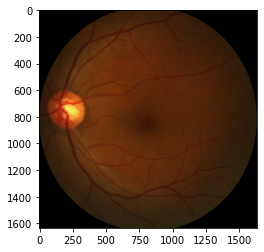

In [12]:
plt.imshow(image_r)

In [21]:
image_o = np.asarray(Image.open(non_glaucoma[1][1][1]))
print(image_o.shape)
image_r = resize(image_o, output_shape=(1634,1634), order=0, preserve_range=True)
print(image_r.shape)

(2056, 2124)
(1634, 1634)


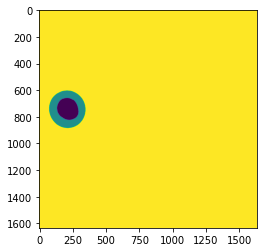

In [22]:
plt.imshow(image_r)

In [23]:
np.unique(image_r)

array([  0., 126., 127., 128., 253.])

In [40]:
gt_3_c = np.zeros((2056,2124,3))
gt_3_c[:,:,0][np.where(image_o == 255)] = 1  
gt_3_c[:,:,1][np.where(image_o == 0)] = 1 
gt_3_c[:,:,2][np.where(image_o == 128)] = 1 

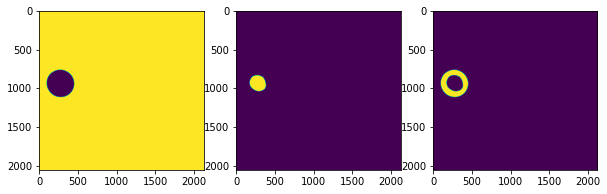

In [50]:
plt.subplots(1,3, figsize=(10,4))
plt.subplot(1,3, 1)
plt.imshow(gplt.subplots(1,3, figsize=(10,4))
plt.subplot(1,3, 1)
plt.imshow(gt_3_c[:,:,0])
plt.subplot(1,3, 2)
plt.imshow(gt_3_c[:,:,1])
plt.subplot(1,3, 3)
plt.imshow(gt_3_c[:,:,2])[:,:,0])
plt.subplot(1,3, 2)
plt.imshow(gt_3_c[:,:,1])
plt.subplot(1,3, 3)
plt.imshow(gt_3_c[:,:,2])

In [46]:
image_b_r = np.round(resize(gt_3_c, output_shape=(1634,1634,3), order=0)).astype(int)

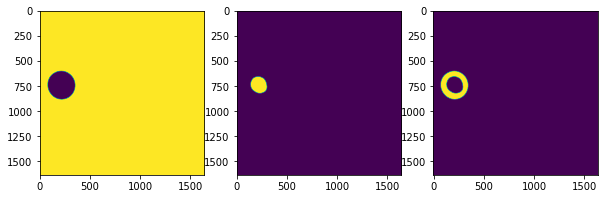

In [53]:
plt.subplots(1,3, figsize=(10,4))
plt.subplot(1,3, 1)
plt.imshow(image_b_r[:,:,0])
plt.subplot(1,3, 2)
plt.imshow(image_b_r[:,:,1])
plt.subplot(1,3, 3)
plt.imshow(image_b_r[:,:,2])

In [134]:
def resize_case(name, image_path, gt_path, desired_shape=(1634,1634,3)):
    print(name)
    # load image and check size
    image_o = np.asarray(Image.open(image_path))
    if image_o.shape != desired_shape:
        print("resizing")
        # load and resize the image 
        image_r = resize(image_o, output_shape=desired_shape, order=1, preserve_range=True)
        
        # load and prepare the gt 
        gt_o = np.asarray(Image.open(gt_path))
        gt_3_c = np.zeros(image_o.shape)
        gt_3_c[:,:,0][np.where(gt_o == 255)] = 1  
        gt_3_c[:,:,1][np.where(gt_o == 0)] = 1 
        gt_3_c[:,:,2][np.where(gt_o == 128)] = 1 

        # resize the ground truth
        gt_r = np.round(resize(gt_3_c, output_shape=desired_shape, order=0)).astype(int)

        # check
        """plt.subplots(1,3, figsize=(10,4))
        plt.subplot(1,3, 1)
        plt.imshow(gt_r[:,:,0])
        plt.subplot(1,3, 2)
        plt.imshow(gt_r[:,:,1])
        plt.subplot(1,3, 3)
        plt.imshow(gt_r[:,:,2])"""

        # save both image and ground truth 
        Image.fromarray(image_r.astype('uint8')).save(os.path.join("/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/resized_data/non_glaucoma/images",\
                                                  name+".jpg"))
        Image.fromarray(gt_r.astype('uint8')).save(os.path.join("/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/resized_data/non_glaucoma/ground_truth",\
                                                  name+".bmp"))
        
    else: 
        # move the orignal image 
        copy(image_path,os.path.join("/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/resized_data/non_glaucoma/images",\
                                                  name+".jpg") )
        # change the ground truth and save to new dir
        gt_o = np.asarray(Image.open(gt_path))
        gt_3_c = np.zeros(image_o.shape)
        gt_3_c[:,:,0][np.where(gt_o == 255)] = 1  
        gt_3_c[:,:,1][np.where(gt_o == 0)] = 1 
        gt_3_c[:,:,2][np.where(gt_o == 128)] = 1 
        Image.fromarray(gt_3_c.astype('uint8')).save(os.path.join("/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/resized_data/non_glaucoma/ground_truth",\
                                                  name+".bmp"))
        
        

#### test the resize function

In [109]:
case = non_glaucoma[0]
resize_case(case[0], case[1][0], case[1][1], desired_shape=(512,512,3))

T0362
resizing


In [120]:
test = np.asarray(Image.open("/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/resized_data/non_glaucoma/ground_truth/T0362.bmp"))

In [111]:
np.unique(test)

array([0, 1], dtype=uint8)

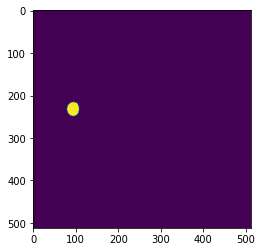

In [121]:
plt.imshow(test[:,:,1])

In [ ]:
for case in non_glaucoma: 
    resize_case(case[0], case[1][0], case[1][1],desired_shape=(512,512,3))

T0196
resizing
T0035
resizing
n0017
resizing
n0047
resizing
V0295
resizing
T0013
resizing
n0333
resizing
T0398
resizing
V0269
resizing
n0196
resizing
V0251
resizing
n0171
resizing
V0081
resizing
T0249
resizing
n0069
resizing
T0252
resizing
n0236
resizing
n0107
resizing
n0212
resizing
T0287
resizing
T0195
resizing
V0114
resizing
n0024
resizing
T0060
resizing
V0122
resizing
V0350
resizing
T0139
resizing
T0095
resizing
n0257
resizing
n0322
resizing
T0289
resizing
n0041
resizing
n0297
resizing
T0103
resizing
V0073
resizing
T0170
resizing
T0156
resizing
T0344
resizing
n0341
resizing
T0393
resizing
T0269
resizing
T0273
resizing
V0047
resizing
n0065
resizing
T0191
resizing
V0177
resizing
V0166
resizing
V0090
resizing
T0091
resizing
n0004
resizing
V0398
resizing
V0072
resizing
V0235
resizing
n0284
resizing
V0331
resizing
n0141
resizing
n0175
resizing
n0036
resizing
T0204
resizing
T0215
resizing
V0163
resizing
T0253
resizing
T0226
resizing
n0037
resizing
T0311
resizing
V0116
resizing
n0269
resi

n0078
resizing
V0051
resizing
V0272
resizing
T0284
resizing
T0105
resizing
n0324
resizing
n0067
resizing
V0099
resizing
V0220
resizing
n0149
resizing
V0369
resizing
T0068
resizing
n0209
resizing
T0308
resizing
n0146
resizing
V0126
resizing
V0254
resizing
V0371
resizing
T0214
resizing
T0079
resizing
V0290
resizing
n0335
resizing
T0167
resizing
V0060
resizing
V0265
resizing
T0020
resizing
n0207
resizing
n0018
resizing
T0258
resizing
n0204
resizing
n0356
resizing
n0087
resizing
n0229
resizing
T0218
resizing
n0355
resizing
T0048
resizing
n0025
resizing
T0319
resizing
V0085
resizing
T0332
resizing
n0304
resizing
n0239
resizing
T0132
resizing
V0237
resizing
n0264
resizing
n0357
resizing
V0033
resizing
T0151
resizing
V0366
resizing
V0124
resizing
n0014
resizing
n0163
resizing
T0260
resizing
V0224
resizing
n0256
resizing
V0062
resizing
V0088
resizing
n0351
resizing
n0178
resizing
n0259
resizing
V0024
resizing
T0224
resizing
n0348
resizing
T0047
resizing
V0068
resizing
T0341
resizing
T0232
resi

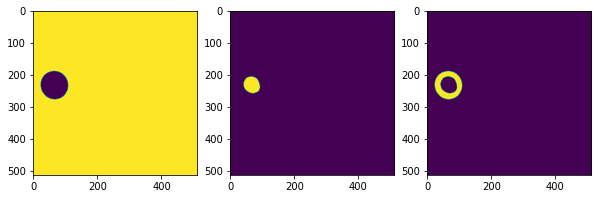

In [114]:
test = np.asarray(Image.open("/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/resized_data/non_glaucoma/ground_truth/n0163.bmp"))
plt.subplots(1,3, figsize=(10,4))
plt.subplot(1,3, 1)
plt.imshow(test[:,:,0])
plt.subplot(1,3, 2)
plt.imshow(test[:,:,1])
plt.subplot(1,3, 3)
plt.imshow(test[:,:,2])

In [115]:
test = np.asarray(Image.open("/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/resized_data/non_glaucoma/images/n0163.jpg"))

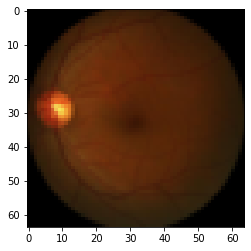

In [118]:
plt.imshow(resize(test, output_shape=(64,64,3), order=1, preserve_range=True).astype(int))

### Resize glaucoma cases

In [129]:
datapath = "/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training"
with open(os.path.join(datapath, "glaucoma.pkl"), 'rb') as file:
    glaucoma = pickle.load(file)
    
glaucoma = sorted(glaucoma.items(), key=lambda x: random.random()) # shuffle 

In [130]:
def resize_case_glaucoma(name, image_path, gt_path, desired_shape=(1634,1634,3)):
    print(name)
    # load image and check size
    image_o = np.asarray(Image.open(image_path))
    if image_o.shape != desired_shape:
        print("resizing")
        # load and resize the image 
        image_r = resize(image_o, output_shape=desired_shape, order=1, preserve_range=True)
        
        # load and prepare the gt 
        gt_o = np.asarray(Image.open(gt_path))
        gt_3_c = np.zeros(image_o.shape)
        gt_3_c[:,:,0][np.where(gt_o == 255)] = 1  
        gt_3_c[:,:,1][np.where(gt_o == 0)] = 1 
        gt_3_c[:,:,2][np.where(gt_o == 128)] = 1 

        # resize the ground truth
        gt_r = np.round(resize(gt_3_c, output_shape=desired_shape, order=0)).astype(int)

        # check
        """plt.subplots(1,3, figsize=(10,4))
        plt.subplot(1,3, 1)
        plt.imshow(gt_r[:,:,0])
        plt.subplot(1,3, 2)
        plt.imshow(gt_r[:,:,1])
        plt.subplot(1,3, 3)
        plt.imshow(gt_r[:,:,2])"""

        # save both image and ground truth 
        Image.fromarray(image_r.astype('uint8')).save(os.path.join("/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/resized_data/glaucoma/images",\
                                                  name+".jpg"))
        Image.fromarray(gt_r.astype('uint8')).save(os.path.join("/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/resized_data/glaucoma/ground_truth",\
                                                  name+".bmp"))
        
    else: 
        # move the orignal image 
        copy(image_path,os.path.join("/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/resized_data/glaucoma/images",\
                                                  name+".jpg") )
        # change the ground truth and save to new dir
        gt_o = np.asarray(Image.open(gt_path))
        gt_3_c = np.zeros(image_o.shape)
        gt_3_c[:,:,0][np.where(gt_o == 255)] = 1  
        gt_3_c[:,:,1][np.where(gt_o == 0)] = 1 
        gt_3_c[:,:,2][np.where(gt_o == 128)] = 1 
        Image.fromarray(gt_3_c.astype('uint8')).save(os.path.join("/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/resized_data/glaucoma/ground_truth",\
                                                  name+".bmp"))
        
        

In [131]:
for case in glaucoma: 
    resize_case_glaucoma(case[0], case[1][0], case[1][1],desired_shape=(512,512,3))

g0035
resizing
T0346
resizing
g0008
resizing
V0049
resizing
g0011
resizing
V0285
resizing
T0315
resizing
g0021
resizing
V0098
resizing
T0322
resizing
T0263
resizing
T0116
resizing
g0018
resizing
V0227
resizing
T0028
resizing
g0027
resizing
g0017
resizing
T0371
resizing
V0075
resizing
V0226
resizing
V0383
resizing
g0030
resizing
T0155
resizing
g0004
resizing
g0009
resizing
T0031
resizing
V0319
resizing
g0005
resizing
g0028
resizing
V0181
resizing
g0025
resizing
T0017
resizing
T0051
resizing
T0188
resizing
g0031
resizing
g0013
resizing
V0216
resizing
T0250
resizing
V0028
resizing
V0205
resizing
V0026
resizing
g0019
resizing
g0022
resizing
V0242
resizing
T0304
resizing
g0015
resizing
V0046
resizing
T0212
resizing
g0033
resizing
g0026
resizing
g0037
resizing
T0049
resizing
V0271
resizing
T0271
resizing
T0267
resizing
g0032
resizing
T0131
resizing
T0094
resizing
g0036
resizing
g0001
resizing
g0014
resizing
V0159
resizing
V0387
resizing
V0149
resizing
V0247
resizing
V0032
resizing
V0175
resi